In [186]:
from os import listdir
import pandas as pd
import matplotlib.pyplot as plt
from scipy import misc
import csv
import numpy as np
%matplotlib inline

df = pd.DataFrame()

PATH = 'GTSRB/Final_Training/Images'
for label_dir in listdir(PATH):
    try: label_dir.index('000')
    except ValueError: continue
    my_path = '{}/{}/'.format(PATH, label_dir)
    df_csv = pd.read_csv('{}/GT-{}.csv'.format(my_path, label_dir), sep=';')
    df_csv['Path'] = my_path
    df = pd.concat([df, df_csv])
    

label_names = []
with open('signnames.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        label_names.append(row[1])

del label_names[0]
class_id_set = range(len(label_names))        

print (label_names)
print ('Points in set:', len(df))


['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Vehicles over 3.5 metric tons prohibited', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End of all speed and passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End of no passing by vehicles over 3.5 metric tons']
Points 

In [165]:
## THIS IS FOR TEST

class_id_set = [5,10,11,12,13,14,15,15,17,18,19,20,24,25,26,28,36]
print ('Number of classes: ', len(class_id_set))
tdf = pd.DataFrame()
t_label_names = []

for i, class_id in enumerate(class_id_set):
    selected = df[df['ClassId'] == class_id]
    selected['ClassId'] = i
    tdf = pd.concat((tdf, selected))
    t_label_names.append(label_names[class_id])

print (t_label_names)
print ('Samples', len(tdf))


label_names = t_label_names
df = tdf


Number of classes:  17


/Users/tempflip/.conda/envs/carnd/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


['Speed limit (80km/h)', 'No passing for vehicles over 3.5 metric tons', 'Right-of-way at the next intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'No vehicles', 'No entry', 'General caution', 'Dangerous curve to the left', 'Dangerous curve to the right', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Children crossing', 'Go straight or right']
Samples 17670


In [187]:
# training and test sets
# shuffling the samples
df = df.sample(frac=1)

TEST_PROP = 0.2

train_set = df.iloc[0: floor(len(df)*(1-TEST_PROP))]
test_set = df.iloc[floor(len(df) * (1-TEST_PROP)):]

print ('Count of train set: ', len(train_set))
print ('Count of test set: ', len(test_set))


Count of train set:  31367
Count of test set:  7842


In [188]:
# adjust item count in train set
item_count = train_set['ClassId'].value_counts()

adjusted_train_set = pd.DataFrame()

for i, class_id in enumerate(class_id_set):
    print ("{}: {} points".format(class_id, item_count.loc[i]))
    
    selected = train_set[train_set['ClassId'] == i]
    adjusted = selected.sample(n=2000, replace=True)
    print (len(selected), len(adjusted))
    adjusted_train_set = pd.concat((adjusted_train_set, adjusted))
    
train_set = adjusted_train_set
print ('Count of adjusted train set:', len(adjusted_train_set))
    

0: 171 points
171 2000
1: 1812 points
1812 2000
2: 1807 points
1807 2000
3: 1139 points
1139 2000
4: 1610 points
1610 2000
5: 1498 points
1498 2000
6: 334 points
334 2000
7: 1158 points
1158 2000
8: 1113 points
1113 2000
9: 1170 points
1170 2000
10: 1594 points
1594 2000
11: 1049 points
1049 2000
12: 1663 points
1663 2000
13: 1710 points
1710 2000
14: 629 points
629 2000
15: 508 points
508 2000
16: 339 points
339 2000
17: 907 points
907 2000
18: 951 points
951 2000
19: 170 points
170 2000
20: 293 points
293 2000
21: 260 points
260 2000
22: 311 points
311 2000
23: 419 points
419 2000
24: 211 points
211 2000
25: 1199 points
1199 2000
26: 481 points
481 2000
27: 194 points
194 2000
28: 437 points
437 2000
29: 214 points
214 2000
30: 364 points
364 2000
31: 622 points
622 2000
32: 187 points
187 2000
33: 529 points
529 2000
34: 333 points
333 2000
35: 949 points
949 2000
36: 310 points
310 2000
37: 173 points
173 2000
38: 1653 points
1653 2000
39: 242 points
242 2000
40: 282 points
282 200

0 2000
1 2000
2 2000
3 2000
4 2000
5 2000
6 2000
7 2000
8 2000
9 2000
10 2000
11 2000
12 2000
13 2000
14 2000
15 2000
16 2000
17 2000
18 2000
19 2000
20 2000
21 2000
22 2000
23 2000
24 2000
25 2000
26 2000
27 2000
28 2000
29 2000
30 2000
31 2000
32 2000
33 2000
34 2000
35 2000
36 2000
37 2000
38 2000
39 2000
40 2000
41 2000
42 2000


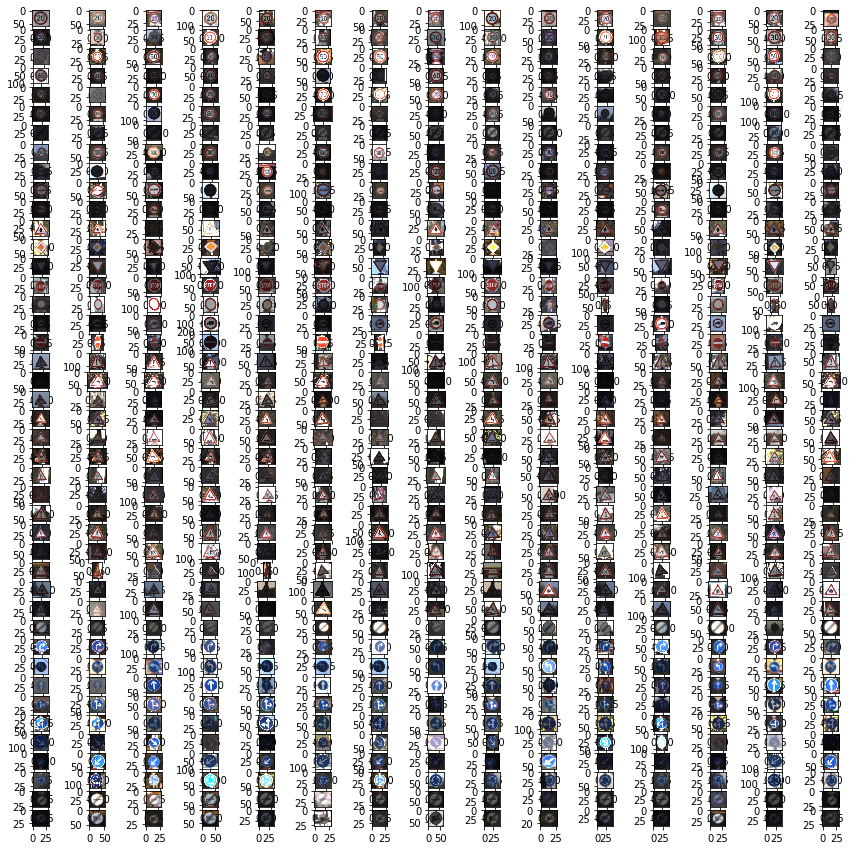

In [190]:
# set visualizations
n = 43
c = 15
plt.figure(figsize=(15,15))
#for i in range(len(label_names)):
for i in range(n):
    selected = train_set.loc[train_set['ClassId'] == i]
    print (i, len(selected))
    for j in range(c):
        plt.subplot(n, c, (i*c) + j+1 )
        plt.imshow(misc.imread(selected.iloc[j]['Path'] + selected.iloc[j]['Filename']))

In [191]:
from sklearn import preprocessing
from skimage import exposure

NORM_W = 32
NORM_H = 32
# the generator
def generator(df, batch_size=100):
    
    while 1:
        df = df.sample(frac=1)
        X, Y = [], []
        for i in range(batch_size):
            img = misc.imresize(misc.imread(df.iloc[i]['Path'] + df.iloc[i]['Filename']), (NORM_W, NORM_H))
            img = exposure.equalize_hist(img)
            X.append(img)
            Y.append(df.iloc[i]['ClassId'])
       
        enc = preprocessing.LabelBinarizer()
        enc.fit(range(len(label_names)))

        yield np.float32(X), np.array(enc.transform(Y))
        

/Users/tempflip/.conda/envs/carnd/lib/python3.5/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


1.0 0.00553385
1.0 0.000325521
1.0 0.000325521
1.0 0.000325521
1.0 0.0123698
1.0 0.00130208
1.0 0.000325521
1.0 0.00325521
1.0 0.00130208
1.0 0.000651042
1.0 0.00130208
1.0 0.00227865
1.0 0.00260417
1.0 0.000325521
1.0 0.000325521
1.0 0.000325521
1.0 0.000325521
1.0 0.000651042
1.0 0.00195312
1.0 0.000651042


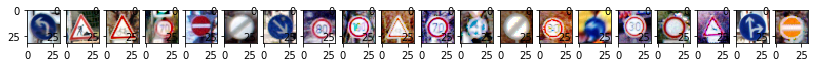

In [192]:
n = 20
test_g = generator(train_set, batch_size = n)

X, Y = next(test_g)

plt.figure(figsize=(14,10))
for x in range(n):
    plt.subplot(1, n, x+1)
    plt.imshow(X[x])
    print(np.max(X[x]), np.min(X[x]))

In [193]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten, Dropout, Lambda
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras import backend as K
import tensorflow as tf


def reduce_palette(x):
    n = 4
    return tf.ceil((x/n) * n)

model = Sequential()
#model.add(Lambda(reduce_palette, input_shape = (32, 32, 3)))

model.add(Convolution2D(32,3,3, input_shape = (32, 32, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Activation('relu'))

model.add(Convolution2D(64,3,3))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Activation('relu'))

model.add(Convolution2D(128,3,3,))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(1000))
model.add(Dense(100))
model.add(Dense(len(label_names)))

print (model.output)


Tensor("add_165:0", shape=(?, 43), dtype=float32)


In [194]:
gen = generator(train_set, batch_size=300)
val_gen = generator(train_set, batch_size=300)


model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history = model.fit_generator(gen, samples_per_epoch=20000, nb_epoch=5, validation_data=val_gen, nb_val_samples=300)



Epoch 1/5


/Users/tempflip/.conda/envs/carnd/lib/python3.5/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


19800/20000 [============================>.] - ETA: 0s - loss: 0.0250 - acc: 0.0433  

/Users/tempflip/.conda/envs/carnd/lib/python3.5/site-packages/keras/engine/training.py:1573: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


20100/20000 [==============================] - 73s - loss: 0.0250 - acc: 0.0441 - val_loss: 0.0222 - val_acc: 0.1200
Epoch 2/5
20100/20000 [==============================] - 61s - loss: 0.0217 - acc: 0.1673 - val_loss: 0.0208 - val_acc: 0.2667

In [199]:
history2 = model.fit_generator(gen, samples_per_epoch=20000, nb_epoch=5, validation_data=val_gen, nb_val_samples=300)


Epoch 1/5


/Users/tempflip/.conda/envs/carnd/lib/python3.5/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


19800/20000 [============================>.] - ETA: 0s - loss: 0.0084 - acc: 0.8527  

/Users/tempflip/.conda/envs/carnd/lib/python3.5/site-packages/keras/engine/training.py:1573: UserWarning: Epoch comprised more than `samples_per_epoch` samples, which might affect learning results. Set `samples_per_epoch` correctly to avoid this warning.
  warnings.warn('Epoch comprised more than '


20100/20000 [==============================] - 63s - loss: 0.0084 - acc: 0.8529 - val_loss: 0.0053 - val_acc: 0.9133
Epoch 2/5
20100/20000 [==============================] - 61s - loss: 0.0075 - acc: 0.8733 - val_loss: 0.0040 - val_acc: 0.9500

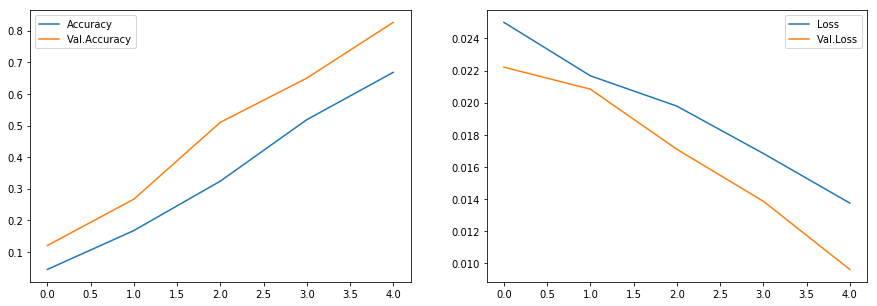

In [196]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history['acc'], label='Accuracy')
plt.plot(history.history['val_acc'], label='Val.Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val.Loss')
plt.legend()

In [249]:
# test

TEST_SIZE = 1000
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0) # only difference

pr_get = generator(test_set, batch_size=TEST_SIZE)
X, Y = next(pr_get)

pr = model.predict(X)

pred_labels = np.argmax(pr, axis=1)
truth = np.argmax(Y, axis=1)

print (pr[1])

match_ratio = sum(pred_labels == truth)
print ('Matches: {} of {}; {} %'.format( match_ratio, TEST_SIZE, match_ratio / TEST_SIZE * 100) )


/Users/tempflip/.conda/envs/carnd/lib/python3.5/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


[ -9.33124032e-03  -1.40158394e-02   5.43875918e-02   5.77540100e-02
  -9.99624282e-03   1.92835666e-02   7.51206875e-02   2.42655724e-02
   1.07723400e-02   3.71218696e-02  -7.17541855e-03   2.09356472e-02
   2.49684453e-02   2.88223345e-02  -5.07040182e-03  -3.66675481e-03
   7.34575372e-03   7.23278103e-03  -1.74724404e-03  -6.64694235e-05
  -2.92464159e-03   3.36708315e-02  -6.22336986e-03   1.99420936e-02
   2.88547087e-03   1.61798391e-02   7.84376729e-03  -4.39299038e-04
   1.57355350e-02   6.45292923e-03  -2.23968998e-02   2.03877036e-03
   1.76026523e-02  -1.69679932e-02   5.75572364e-02   6.60662726e-02
   6.02065846e-02   8.35515335e-02   2.72838622e-01  -5.62939886e-03
   5.84080145e-02  -2.06850539e-03   3.26352790e-02]
Matches: 960 of 1000; 96.0 %


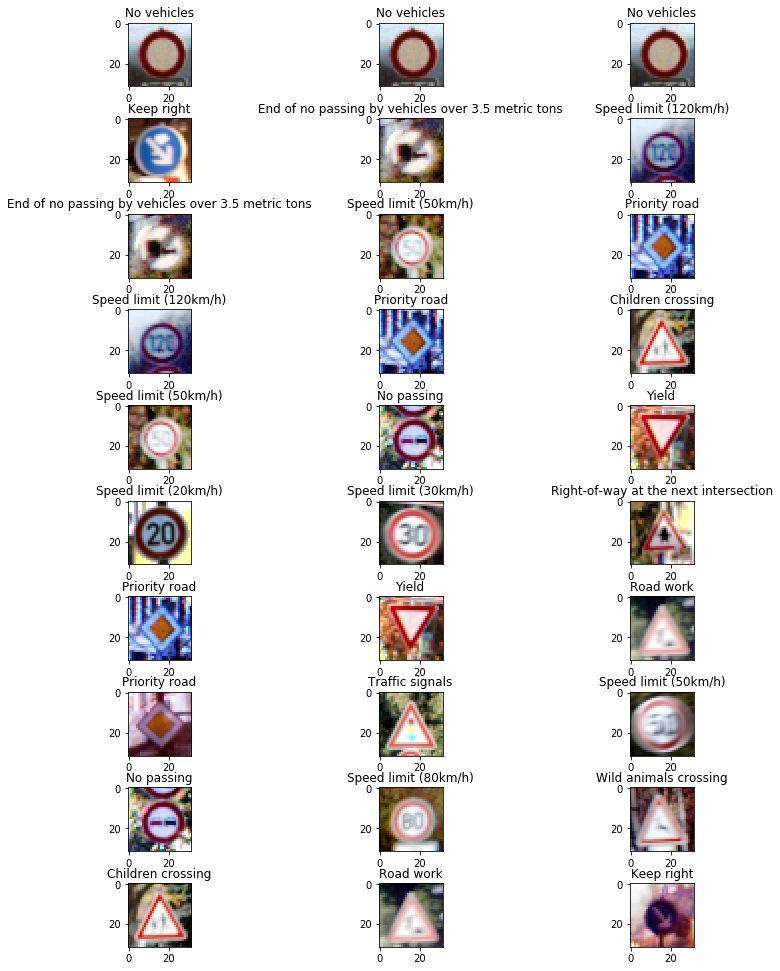

In [250]:
n = 10
m = 3
f, ax = plt.subplots(n,m, figsize = (12,17))
plt.subplots_adjust(hspace = 0.5, wspace=0.5)

for j in range(n):
    for k in range(m):
        i = k * j + j
        
        ax[j,k].imshow(X[i])
        ax[j,k].set_title(label_names[np.argsort(Y[i])[-1]])

